In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airfare-database/cleaned_data.csv
/kaggle/input/airfare-database/raw_data.csv


# Loading data sets

In [2]:
#loading data
train_data=pd.read_csv("/kaggle/input/airfare-database/cleaned_data.csv")
test_data=pd.read_csv("/kaggle/input/airfare-database/raw_data.csv",low_memory=False)

# Training Data

In [3]:
train_data.head()

,Unnamed: 0,airline,flight_code,source_city,time_taken,stop,destinate_city,price,Class,Days_Left,dep_time_category,arr_time_category
0,0,SpiceJet,SG-8709,Delhi,130,non-stop,Mumbai,5953,Economy,1,Evening,Night
1,1,SpiceJet,SG-8157,Delhi,140,non-stop,Mumbai,5953,Economy,1,Early Morning,Morning
2,2,AirAsia,I5-764,Delhi,130,non-stop,Mumbai,5956,Economy,1,Early Morning,Early Morning
3,3,Vistara,UK-995,Delhi,135,non-stop,Mumbai,5955,Economy,1,Morning,Afternoon
4,4,Vistara,UK-963,Delhi,140,non-stop,Mumbai,5955,Economy,1,Morning,Morning


# Testing Data

In [4]:
test_data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,6:20,Delhi,02h 20m,non-stop,8:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,4:25,Delhi,02h 10m,non-stop,6:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,8:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


# Size of data 

In [5]:
#size of data 
train_data.size,test_data.size


(3587112, 3614460)

# Shape of data

In [6]:
#shape of data
train_data.shape,test_data.shape

((298926, 12), (301205, 12))

# Information of data sets

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298926 entries, 0 to 298925
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         298926 non-null  int64 
 1   airline            298926 non-null  object
 2   flight_code        298926 non-null  object
 3   source_city        298926 non-null  object
 4   time_taken         298926 non-null  int64 
 5   stop               298926 non-null  object
 6   destinate_city     298926 non-null  object
 7   price              298926 non-null  int64 
 8   Class              298926 non-null  object
 9   Days_Left          298926 non-null  int64 
 10  dep_time_category  298926 non-null  object
 11  arr_time_category  298926 non-null  object
dtypes: int64(4), object(8)
memory usage: 27.4+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301205 entries, 0 to 301204
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        301198 non-null  object
 1   airline     301196 non-null  object
 2   ch_code     301195 non-null  object
 3   num_code    301197 non-null  object
 4   dep_time    301198 non-null  object
 5   from        301193 non-null  object
 6   time_taken  301193 non-null  object
 7   stop        301198 non-null  object
 8   arr_time    301192 non-null  object
 9   to          301196 non-null  object
 10  price       301193 non-null  object
 11  Class       301199 non-null  object
dtypes: object(12)
memory usage: 27.6+ MB


# Checking missing values in dataset

In [9]:
# Checking missing values in dataset
train_data.isnull().values.any(),test_data.isnull().values.any()

(False, True)

In [10]:
train_data.isnull().sum()

Unnamed: 0           0
airline              0
flight_code          0
source_city          0
time_taken           0
stop                 0
destinate_city       0
price                0
Class                0
Days_Left            0
dep_time_category    0
arr_time_category    0
dtype: int64

In [11]:
test_data.isnull().sum()

date           7
airline        9
ch_code       10
num_code       8
dep_time       7
from          12
time_taken    12
stop           7
arr_time      13
to             9
price         12
Class          6
dtype: int64

# Checking if there are any Duplicate values

In [12]:
train_data.dropna(inplace=True)

In [13]:
# Checking if there are any Duplicate values
train_data[train_data.duplicated()]

,Unnamed: 0,airline,flight_code,source_city,time_taken,stop,destinate_city,price,Class,Days_Left,dep_time_category,arr_time_category


In [14]:
# Drop duplicates value
train_data.drop_duplicates(keep='first',inplace=True)

# Calculating the date after number of days left in train data

In [15]:
# Define the base date components (10-02-2022)
base_day = 10
base_month = 2
base_year = 2022

# Convert Days_Left to numeric
train_data["Days_Left"] = pd.to_numeric(train_data["Days_Left"], errors="coerce")

# Function to manually calculate new date
def calculate_date(days_left):
    if pd.isna(days_left):
        return None  # Handle NaN values

    days_left = int(days_left)  # Convert to integer
    day = base_day + days_left
    month = base_month
    year = base_year

    # Days in each month (ignoring leap years for simplicity)
    days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    # Adjust for February in a leap year
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        days_in_month[1] = 29  # Leap year February

    # Adjust day and month
    while day > days_in_month[month - 1]:  # Check if day exceeds the month's limit
        day -= days_in_month[month - 1]
        month += 1
        if month > 12:  # If month exceeds December, increment year
            month = 1
            year += 1

    # Format as DD-MM-YYYY
    return f"{day:02d}-{month:02d}-{year}"

# Apply function to create Date_of_Journey
train_data["Date_of_Journey"] = train_data["Days_Left"].apply(calculate_date)

# Display the first few rows to verify
train_data.head()

,Unnamed: 0,airline,flight_code,source_city,time_taken,stop,destinate_city,price,Class,Days_Left,dep_time_category,arr_time_category,Date_of_Journey
0,0,SpiceJet,SG-8709,Delhi,130,non-stop,Mumbai,5953,Economy,1,Evening,Night,11-02-2022
1,1,SpiceJet,SG-8157,Delhi,140,non-stop,Mumbai,5953,Economy,1,Early Morning,Morning,11-02-2022
2,2,AirAsia,I5-764,Delhi,130,non-stop,Mumbai,5956,Economy,1,Early Morning,Early Morning,11-02-2022
3,3,Vistara,UK-995,Delhi,135,non-stop,Mumbai,5955,Economy,1,Morning,Afternoon,11-02-2022
4,4,Vistara,UK-963,Delhi,140,non-stop,Mumbai,5955,Economy,1,Morning,Morning,11-02-2022


# Converting time_taken (in hours and minutes) to time_taken (minutes) in train_data

In [16]:
def convert_time_to_minutes(time_str):
    try:
        # Extract numbers from string (handles cases like '5h 30m')
        hours = int(time_str.split('h')[0]) if 'h' in time_str else 0
        mins = int(time_str.split('h')[-1].split('m')[0]) if 'm' in time_str else 0
        return hours * 60 + mins
    except:
        return None

# Apply conversion
test_data["time_taken"] = test_data["time_taken"].apply(convert_time_to_minutes)


#remove unammed :0
train_data = train_data.loc[:, ~train_data.columns.str.contains('^Unnamed')]


train_data.head()


,airline,flight_code,source_city,time_taken,stop,destinate_city,price,Class,Days_Left,dep_time_category,arr_time_category,Date_of_Journey
0,SpiceJet,SG-8709,Delhi,130,non-stop,Mumbai,5953,Economy,1,Evening,Night,11-02-2022
1,SpiceJet,SG-8157,Delhi,140,non-stop,Mumbai,5953,Economy,1,Early Morning,Morning,11-02-2022
2,AirAsia,I5-764,Delhi,130,non-stop,Mumbai,5956,Economy,1,Early Morning,Early Morning,11-02-2022
3,Vistara,UK-995,Delhi,135,non-stop,Mumbai,5955,Economy,1,Morning,Afternoon,11-02-2022
4,Vistara,UK-963,Delhi,140,non-stop,Mumbai,5955,Economy,1,Morning,Morning,11-02-2022


# To merge num_code and ch_code to flight_code in test_data

In [17]:
# Ensure num_code is a string and remove any decimal points if necessary
test_data["num_code"] = test_data["num_code"].astype(str).str.split(".").str[0]

# Fill NaN values in ch_code and num_code to avoid errors during concatenation
test_data["ch_code"] = test_data["ch_code"].fillna("")
test_data["num_code"] = test_data["num_code"].fillna("")

# Merge ch_code and num_code with a hyphen
test_data["flight_code"] = test_data["ch_code"] + "-" + test_data["num_code"]

# Remove trailing hyphen if num_code is empty
test_data["flight_code"] = test_data["flight_code"].str.rstrip("-")

# Drop ch_code  columns from test_data
test_data.drop(columns=['ch_code'], inplace=True)

# Drop num_code  columns from test_data
test_data.drop(columns=['num_code'], inplace=True)

# Display results
test_data.head()


,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,Class,flight_code
0,11-02-2022,SpiceJet,18:55,Delhi,130.0,non-stop,21:05,Mumbai,"5,953",Economy,SG-8709
1,11-02-2022,SpiceJet,6:20,Delhi,140.0,non-stop,8:40,Mumbai,"5,953",Economy,SG-8157
2,11-02-2022,AirAsia,4:25,Delhi,130.0,non-stop,6:35,Mumbai,"5,956",Economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,135.0,non-stop,12:35,Mumbai,"5,955",Economy,UK-995
4,11-02-2022,Vistara,8:50,Delhi,140.0,non-stop,11:10,Mumbai,"5,955",Economy,UK-963


# Finding number of flights per day and making it into a plot graph

In [18]:
# Convert 'Date_of_Journey' to datetime format
train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d-%m-%Y", errors="coerce")

# Extract day, month, and year
train_data["date"] = train_data["Date_of_Journey"].dt.strftime("%d-%m-%Y")

# Count flights per day
flights_per_day = train_data["date"].value_counts().sort_index()

# Display results
flights_per_day


date
01-03-2022    6531
02-03-2022    6479
03-03-2022    6460
04-03-2022    6472
05-03-2022    6383
06-03-2022    6520
07-03-2022    6622
08-03-2022    6563
09-03-2022    6340
10-03-2022    6510
11-02-2022    1889
11-03-2022    6386
12-02-2022    3955
12-03-2022    6485
13-02-2022    4170
13-03-2022    6510
14-02-2022    5028
14-03-2022    6576
15-02-2022    5350
15-03-2022    6521
16-02-2022    5709
16-03-2022    6402
17-02-2022    5652
17-03-2022    6275
18-02-2022    5735
18-03-2022    6474
19-02-2022    5613
19-03-2022    6461
20-02-2022    5778
20-03-2022    6492
21-02-2022    6395
21-03-2022    6580
22-02-2022    6354
22-03-2022    6516
23-02-2022    6385
23-03-2022    6511
24-02-2022    6296
24-03-2022    6478
25-02-2022    6309
25-03-2022    6459
26-02-2022    6231
26-03-2022    6413
27-02-2022    6381
27-03-2022    6294
28-02-2022    6568
28-03-2022    6145
29-03-2022    6052
30-03-2022    6066
31-03-2022    6152
Name: count, dtype: int64

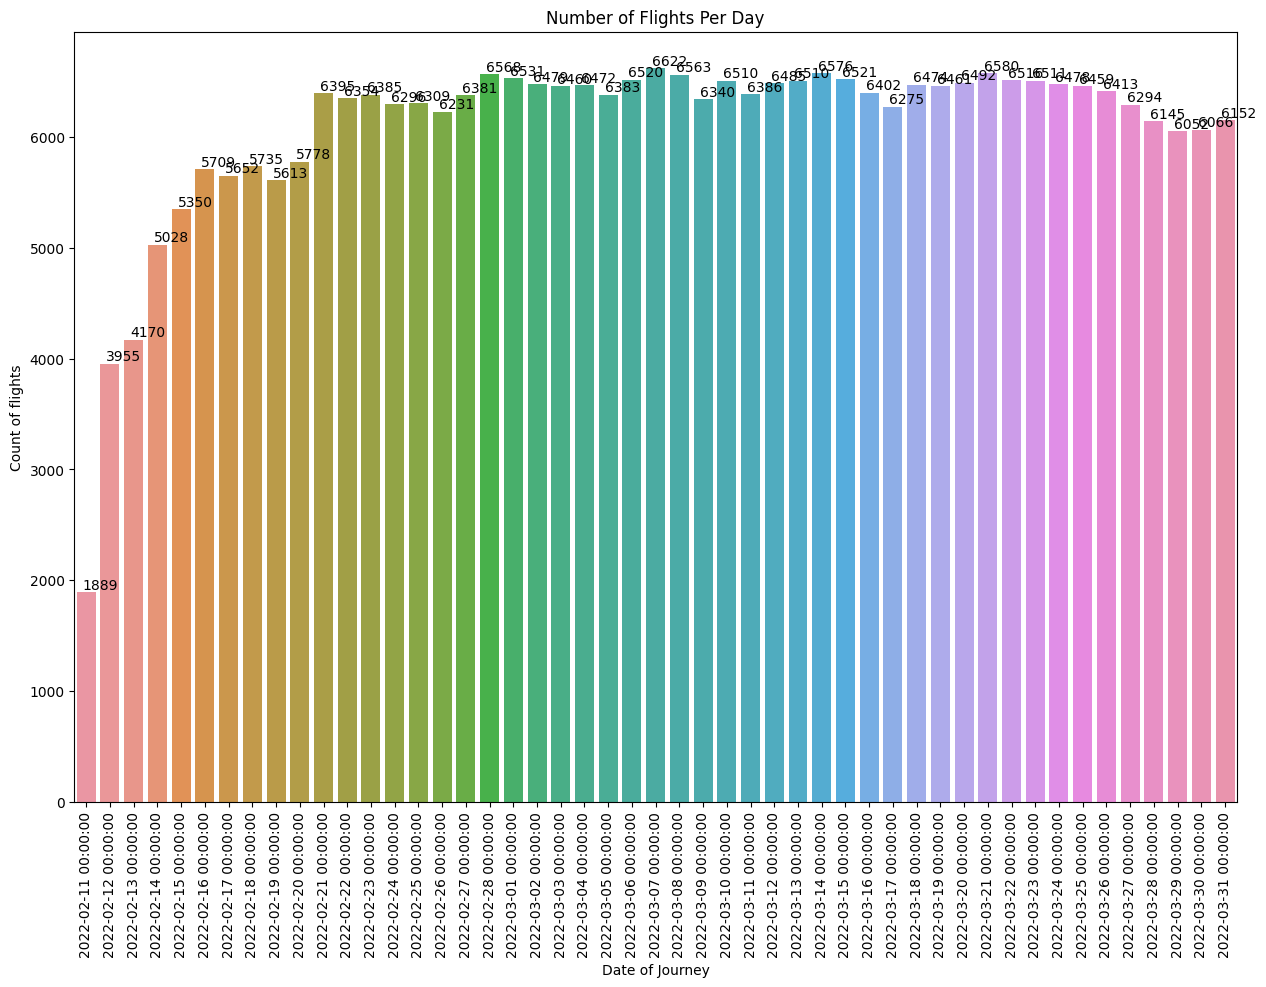

In [19]:
plt.figure(figsize = (15, 10))
plt.title('Number of Flights Per Day')
ax=sns.countplot(x = 'Date_of_Journey', data =train_data)
plt.xlabel('Date of Journey')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')


# Normalizing number of stops 

In [20]:
# Clean up spaces and newlines in test_data
test_data["stop"] = test_data["stop"].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)
test_data["stop"] = test_data["stop"].astype(str).str.strip().str.replace(r'\n+', ' ', regex=True)

# Define a consistent mapping
stop_mapping = {
    "non-stop": 0,
    "1-stop": 1,
    "2+-stops": 2,
    "1-stop Via IXU": 1,
    "1-stop Via IDR": 1
}

# Apply mapping safely, keeping NaNs for unknown values
train_data.loc[:, "stop"] = train_data["stop"].map(stop_mapping)
test_data.loc[:, "stop"] = test_data["stop"].map(stop_mapping)

# Convert 'stop' to numeric explicitly (handles NaNs)
train_data["stop"] = pd.to_numeric(train_data["stop"], errors="coerce")
test_data["stop"] = pd.to_numeric(test_data["stop"], errors="coerce")

# Handle missing values (Check if mode exists first)
if not train_data["stop"].mode().empty:
    train_data["stop"].fillna(train_data["stop"].mode()[0], inplace=True)

if not test_data["stop"].mode().empty:
    test_data["stop"].fillna(test_data["stop"].mode()[0], inplace=True)


# Display first few rows
test_data.head()

<ipython-input-20-f1f85ea771af>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["stop"].fillna(train_data["stop"].mode()[0], inplace=True)
<ipython-input-20-f1f85ea771af>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,Class,flight_code
0,11-02-2022,SpiceJet,18:55,Delhi,130.0,0.0,21:05,Mumbai,"5,953",Economy,SG-8709
1,11-02-2022,SpiceJet,6:20,Delhi,140.0,0.0,8:40,Mumbai,"5,953",Economy,SG-8157
2,11-02-2022,AirAsia,4:25,Delhi,130.0,0.0,6:35,Mumbai,"5,956",Economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,135.0,0.0,12:35,Mumbai,"5,955",Economy,UK-995
4,11-02-2022,Vistara,8:50,Delhi,140.0,0.0,11:10,Mumbai,"5,955",Economy,UK-963


# Number of flights per airline

In [21]:
train_data["airline"].value_counts()

airline
Vistara      127334
Air India     79820
Indigo        43240
GO FIRST      23247
AirAsia       16149
SpiceJet       9034
StarAir          61
Trujet           41
Name: count, dtype: int64

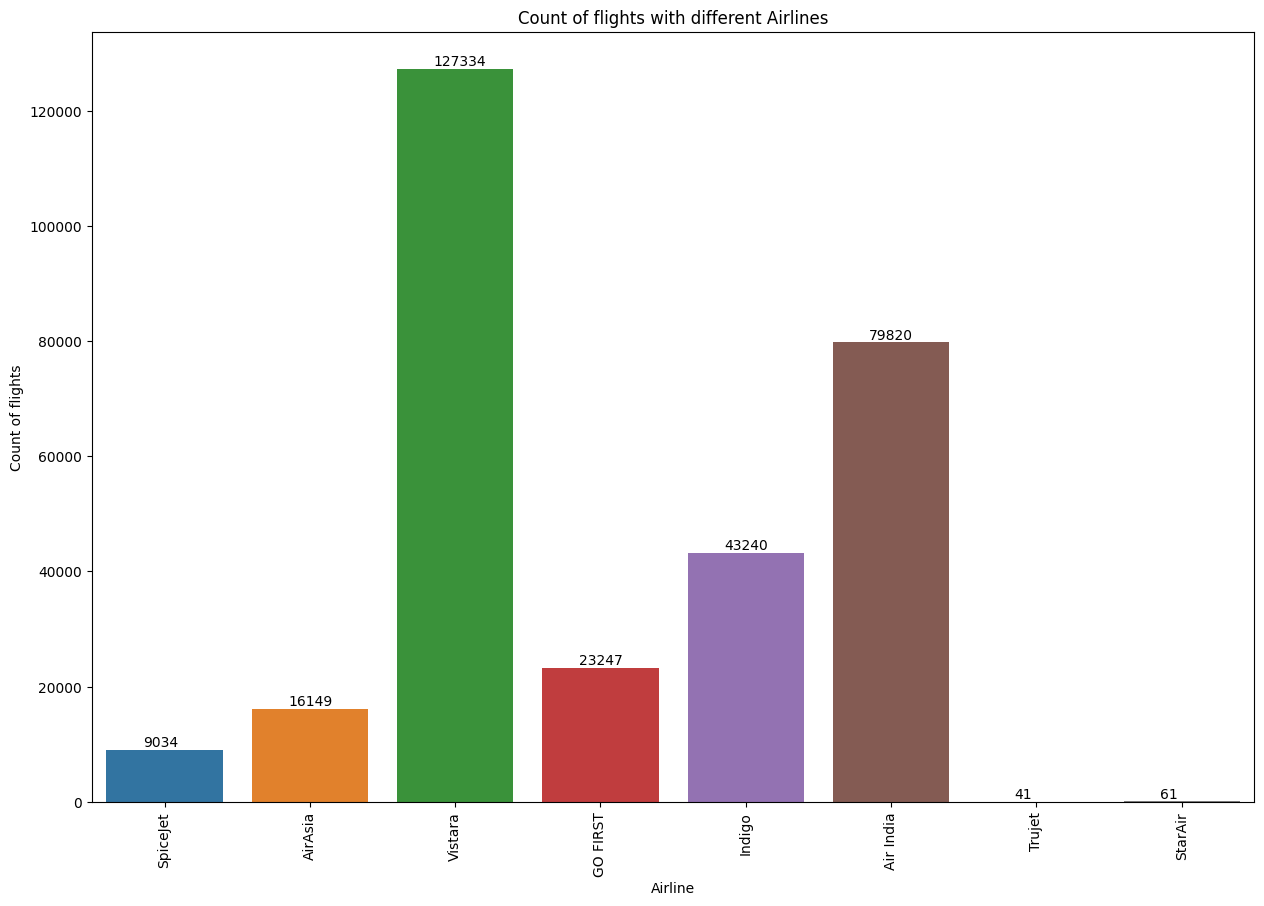

In [22]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [23]:
test_data["airline"].value_counts()

airline
Vistara      128271
Air India     81110
Indigo        43258
GO FIRST      23258
AirAsia       16154
SpiceJet       9037
StarAir          61
Trujet           41
Unknown           6
Name: count, dtype: int64

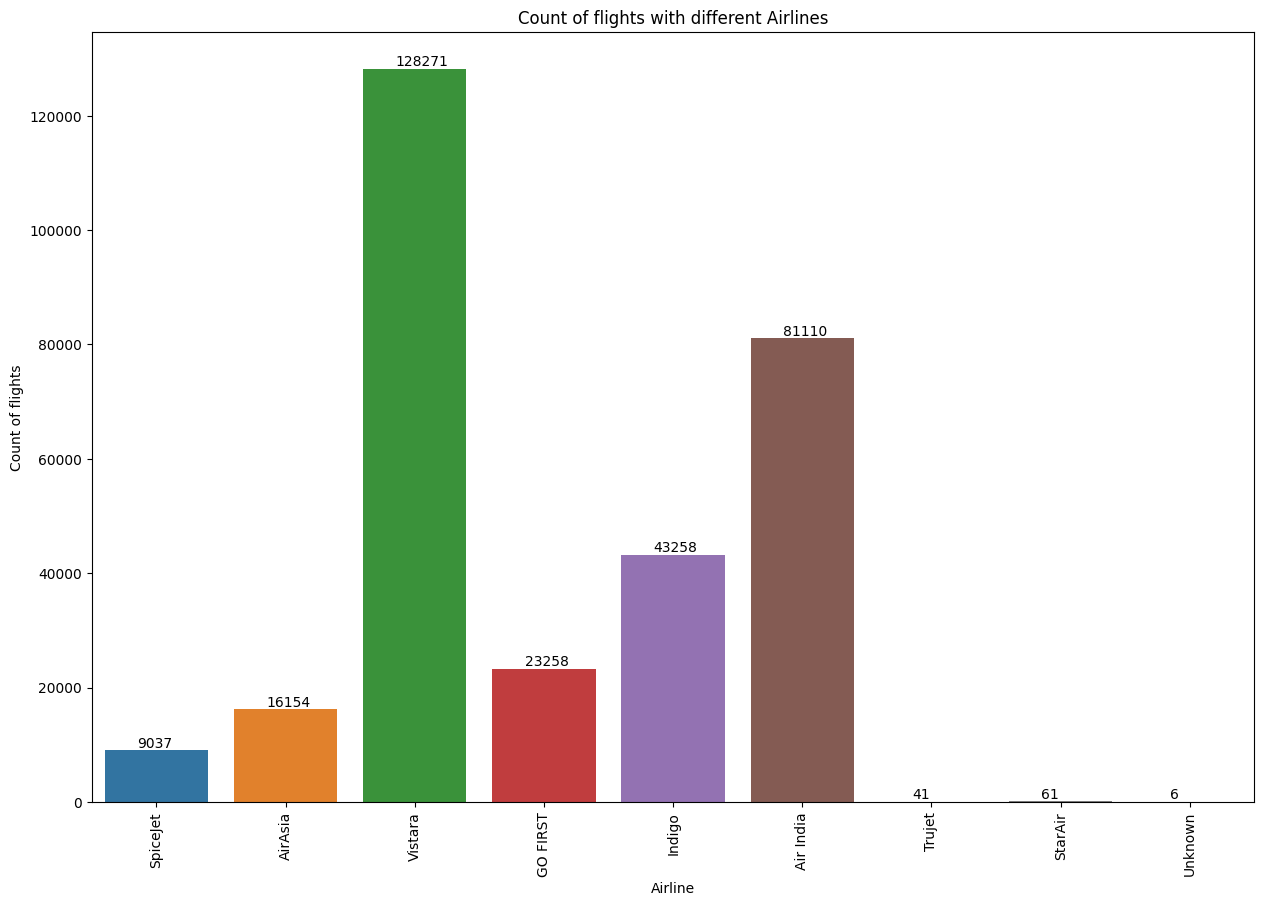

In [24]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'airline', data =test_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'AirAsia'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'GO FIRST'),
  Text(4, 0, 'Indigo'),
  Text(5, 0, 'Air India'),
  Text(6, 0, 'Trujet'),
  Text(7, 0, 'StarAir')])

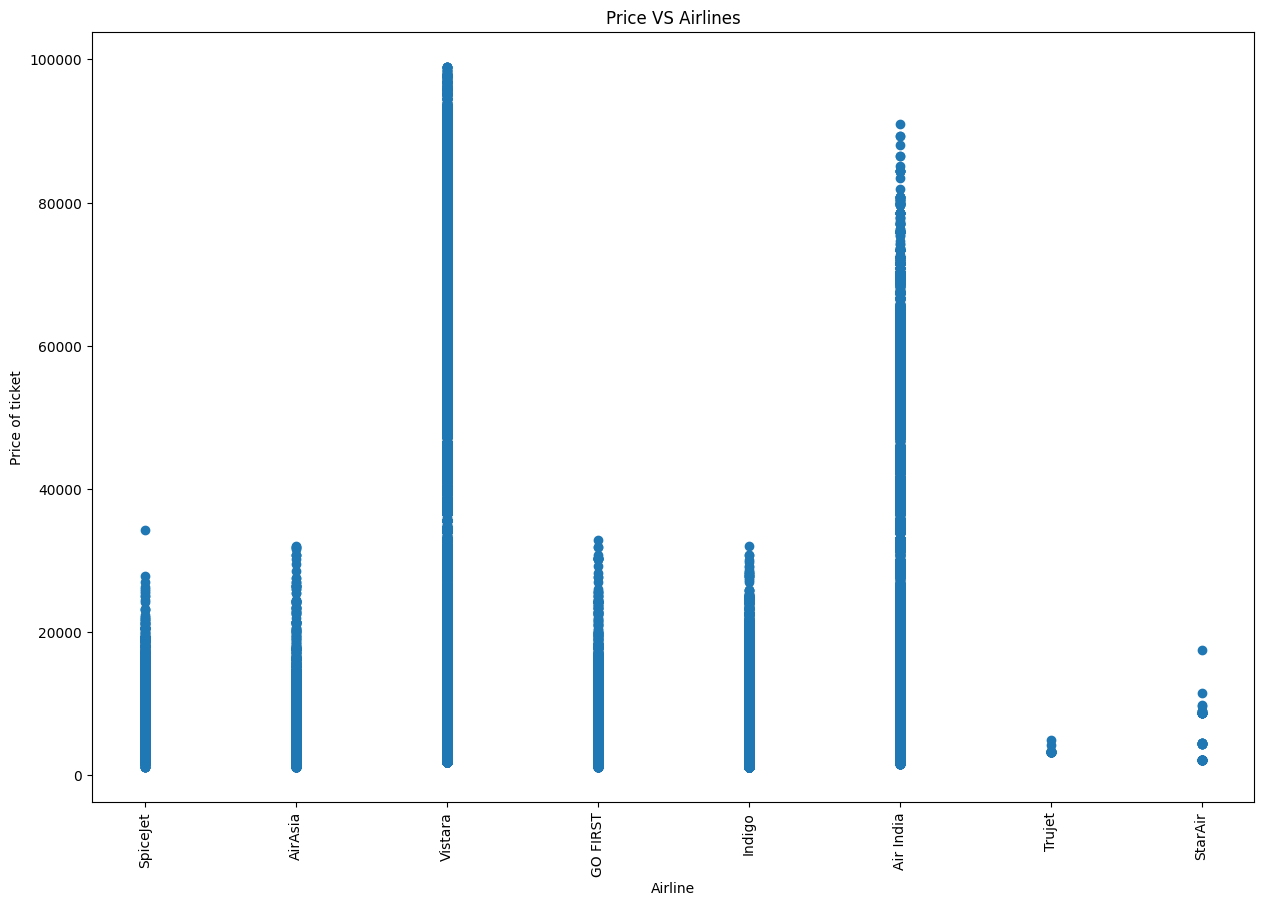

In [25]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['airline'], train_data['price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

# Combining "Truejet","StarAir","Unknown"into the same class "Other"

In [26]:
# Airline
train_data["airline"].replace({'Trujet':'Other','StarAir':'Other'}, inplace=True)

test_data["airline"].replace({'Trujet':'Other','StarAir':'Other','Unknown':'Other'},inplace=True)

<ipython-input-26-5631fd30c1ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["airline"].replace({'Trujet':'Other','StarAir':'Other'}, inplace=True)
<ipython-input-26-5631fd30c1ef>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

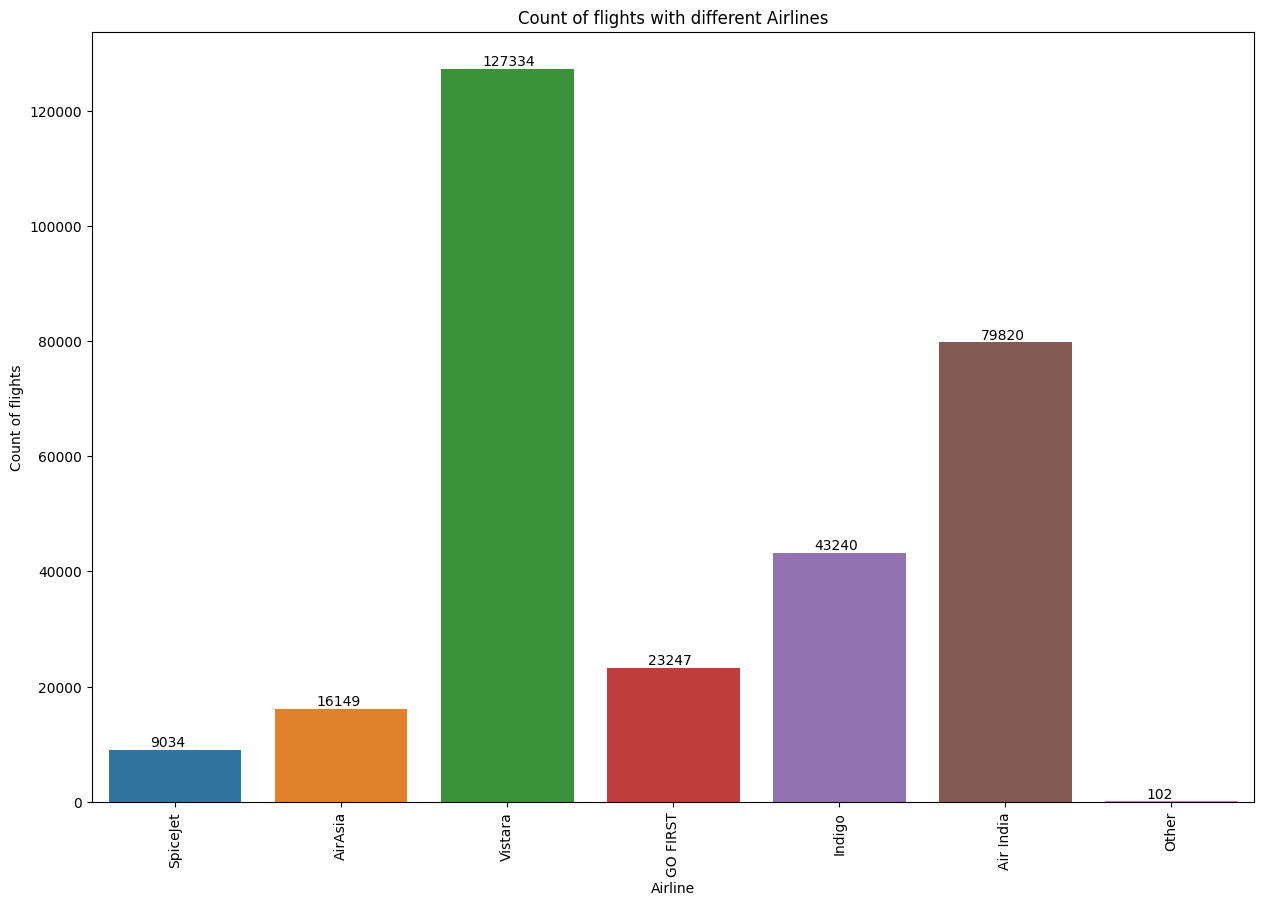

In [27]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [28]:
train_data["airline"].value_counts()

airline
Vistara      127334
Air India     79820
Indigo        43240
GO FIRST      23247
AirAsia       16149
SpiceJet       9034
Other           102
Name: count, dtype: int64

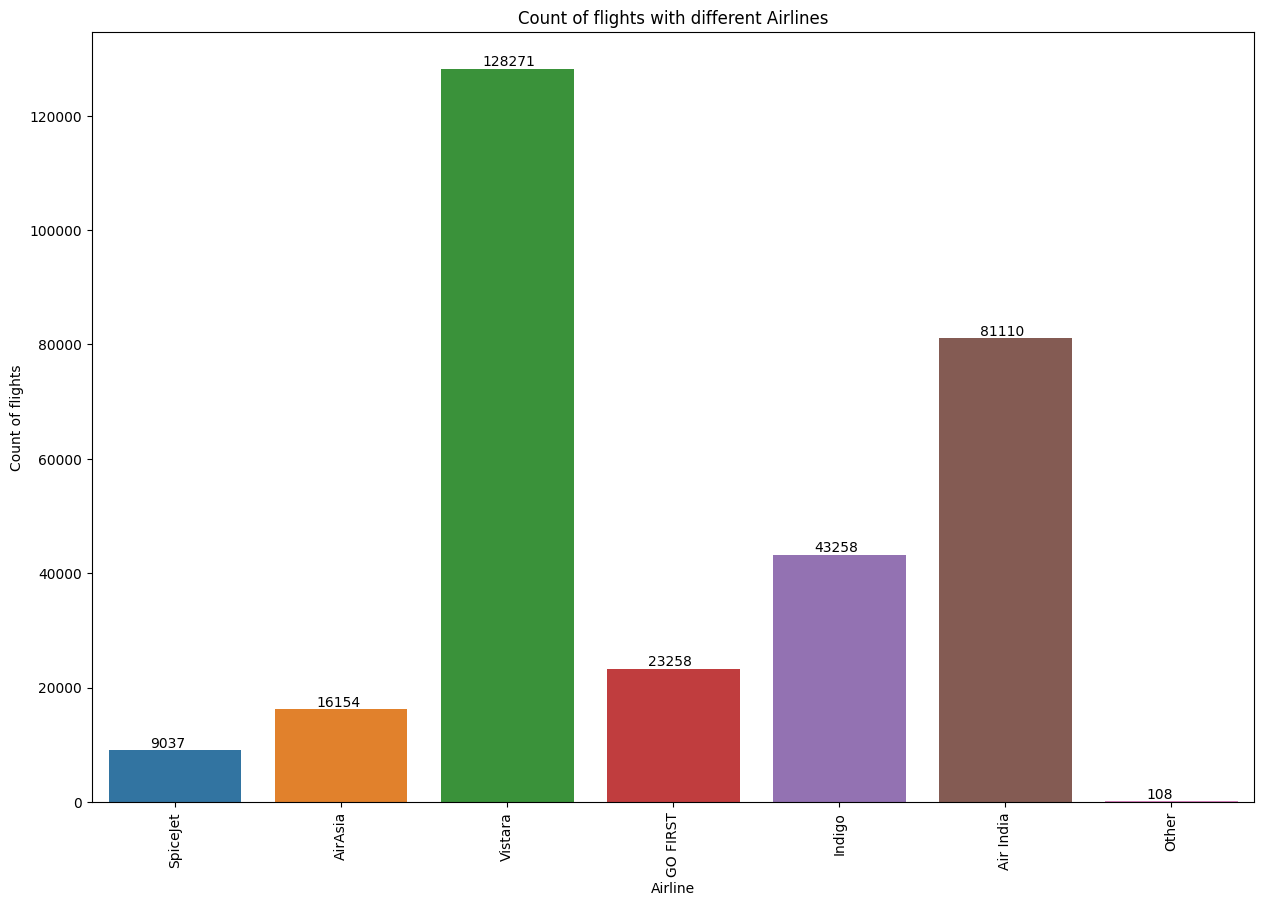

In [29]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'airline', data =test_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [30]:
test_data["airline"].value_counts()

airline
Vistara      128271
Air India     81110
Indigo        43258
GO FIRST      23258
AirAsia       16154
SpiceJet       9037
Other           108
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'AirAsia'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'GO FIRST'),
  Text(4, 0, 'Indigo'),
  Text(5, 0, 'Air India'),
  Text(6, 0, 'Other')])

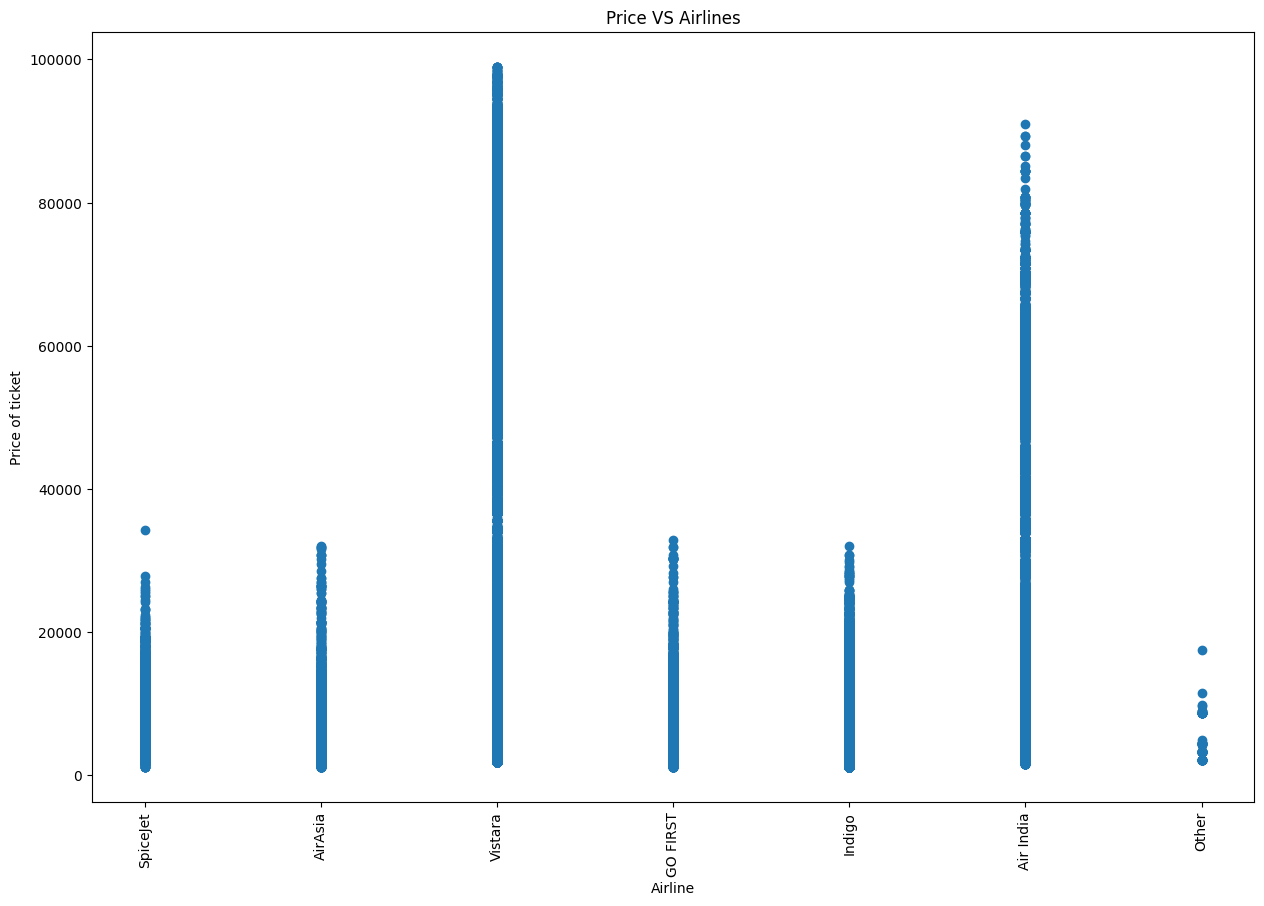

In [31]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['airline'], train_data['price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

# FIXING COLUMN NAMES FOR BOTH TEST AND TRAIN

In [32]:
test_data.rename(columns={
    "from": "source_city",
    "to": "destinate_city",
    "dep_time": "dep_time_category",
    "arr_time": "arr_time_category"
}, inplace=True)

In [33]:
test_data.head()

,date,airline,dep_time_category,source_city,time_taken,stop,arr_time_category,destinate_city,price,Class,flight_code
0,11-02-2022,SpiceJet,18:55,Delhi,130.0,0.0,21:05,Mumbai,"5,953",Economy,SG-8709
1,11-02-2022,SpiceJet,6:20,Delhi,140.0,0.0,8:40,Mumbai,"5,953",Economy,SG-8157
2,11-02-2022,AirAsia,4:25,Delhi,130.0,0.0,6:35,Mumbai,"5,956",Economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,135.0,0.0,12:35,Mumbai,"5,955",Economy,UK-995
4,11-02-2022,Vistara,8:50,Delhi,140.0,0.0,11:10,Mumbai,"5,955",Economy,UK-963


In [34]:
train_data.head()

,airline,flight_code,source_city,time_taken,stop,destinate_city,price,Class,Days_Left,dep_time_category,arr_time_category,Date_of_Journey,date
0,SpiceJet,SG-8709,Delhi,130,0.0,Mumbai,5953,Economy,1,Evening,Night,2022-02-11,11-02-2022
1,SpiceJet,SG-8157,Delhi,140,0.0,Mumbai,5953,Economy,1,Early Morning,Morning,2022-02-11,11-02-2022
2,AirAsia,I5-764,Delhi,130,0.0,Mumbai,5956,Economy,1,Early Morning,Early Morning,2022-02-11,11-02-2022
3,Vistara,UK-995,Delhi,135,0.0,Mumbai,5955,Economy,1,Morning,Afternoon,2022-02-11,11-02-2022
4,Vistara,UK-963,Delhi,140,0.0,Mumbai,5955,Economy,1,Morning,Morning,2022-02-11,11-02-2022


# Dropping unnecessary classes before Machine Learning

In [35]:
test_data.drop(columns=['Unnamed: 0', 'flight_code', 'date'], inplace=True, errors='ignore')
test_data.head() 

,airline,dep_time_category,source_city,time_taken,stop,arr_time_category,destinate_city,price,Class
0,SpiceJet,18:55,Delhi,130.0,0.0,21:05,Mumbai,"5,953",Economy
1,SpiceJet,6:20,Delhi,140.0,0.0,8:40,Mumbai,"5,953",Economy
2,AirAsia,4:25,Delhi,130.0,0.0,6:35,Mumbai,"5,956",Economy
3,Vistara,10:20,Delhi,135.0,0.0,12:35,Mumbai,"5,955",Economy
4,Vistara,8:50,Delhi,140.0,0.0,11:10,Mumbai,"5,955",Economy


In [36]:
train_data.drop(columns=['Unnamed: 0', 'flight_code', 'Date_of_Journey','date'], inplace=True, errors='ignore')
train_data.head()

,airline,source_city,time_taken,stop,destinate_city,price,Class,Days_Left,dep_time_category,arr_time_category
0,SpiceJet,Delhi,130,0.0,Mumbai,5953,Economy,1,Evening,Night
1,SpiceJet,Delhi,140,0.0,Mumbai,5953,Economy,1,Early Morning,Morning
2,AirAsia,Delhi,130,0.0,Mumbai,5956,Economy,1,Early Morning,Early Morning
3,Vistara,Delhi,135,0.0,Mumbai,5955,Economy,1,Morning,Afternoon
4,Vistara,Delhi,140,0.0,Mumbai,5955,Economy,1,Morning,Morning


# Filling the missing values with median

In [37]:
# Replace 'Unknown' with NaN
test_data.loc[:, "price"] = test_data["price"].replace("Unknown", np.nan)
test_data.loc[:, "time_taken"] = test_data["time_taken"].replace("Unknown", np.nan)

# Remove commas and convert to numeric
train_data.loc[:, "price"] = pd.to_numeric(train_data["price"].astype(str).str.replace(",", ""), errors='coerce')
test_data.loc[:, "price"] = pd.to_numeric(test_data["price"].astype(str).str.replace(",", ""), errors='coerce')
train_data.loc[:, "time_taken"] = pd.to_numeric(train_data["time_taken"].astype(str).str.replace(",", ""), errors='coerce')
test_data.loc[:, "time_taken"] = pd.to_numeric(test_data["time_taken"].astype(str).str.replace(",", ""), errors='coerce')

# Fill missing values with median & explicitly convert back to float
test_data.loc[:, "price"] = test_data["price"].fillna(test_data["price"].median()).astype(float)
test_data.loc[:, "time_taken"] = test_data["time_taken"].fillna(test_data["time_taken"].median()).astype(float)

# Final check
print("Missing values in train_data (price):", train_data["price"].isnull().sum())
print("Missing values in test_data (price):", test_data["price"].isnull().sum())

print("Missing values in train_data (time_taken):", train_data["time_taken"].isnull().sum())
print("Missing values in test_data (time_taken):", test_data["time_taken"].isnull().sum())

print("Data cleaning completed successfully!")

Missing values in train_data (price): 0
Missing values in test_data (price): 0
Missing values in train_data (time_taken): 0
Missing values in test_data (time_taken): 0
Data cleaning completed successfully!


<ipython-input-37-2fe50dcdef89>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.loc[:, "price"] = test_data["price"].fillna(test_data["price"].median()).astype(float)


In [38]:
print(train_data["price"].dtype)  # Should be float64 or int64
print(test_data["time_taken"].dtype)  # Should be float64 or int64

int64
float64


# Machine learning 

In [39]:
# Select features and target variable
X = train_data.drop(columns=["price"])  # Features
y = train_data["price"]  # Target variable

In [40]:
test_data_original=test_data

In [41]:
# One-Hot Encoding for categorical features
X = pd.get_dummies(X, columns=["airline", "source_city", "destinate_city", "Class", "dep_time_category", "arr_time_category"], drop_first=True)

# Apply same transformation to test_data
test_data = pd.get_dummies(test_data, columns=["airline", "source_city", "destinate_city", "Class", "dep_time_category", "arr_time_category"], drop_first=True)

# Ensure test_data has same features as X
missing_cols = set(X.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0  # Add missing columns

test_data = test_data[X.columns]  # Ensure column order matches

In [42]:
 from sklearn.model_selection import train_test_split

# 80% training, 20% validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_valid)

# Evaluate model performance
print("MAE:", mean_absolute_error(y_valid, y_pred))
print("RMSE:", mean_squared_error(y_valid, y_pred, squared=False))
print("R^2 Score:", r2_score(y_valid, y_pred))

MAE: 4576.5872690981
RMSE: 6698.4552927679015
R^2 Score: 0.9124562384395242


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_rf_pred = rf_model.predict(X_valid)
print("RF MAE:", mean_absolute_error(y_valid, y_rf_pred))
print("RF RMSE:", mean_squared_error(y_valid, y_rf_pred, squared=False))
print("RF R² Score:", r2_score(y_valid, y_rf_pred))

RF MAE: 1103.6308199561843
RF RMSE: 2789.452417291469
RF R² Score: 0.9848185311693618


In [45]:
test_predictions = rf_model.predict(test_data)

# Save predictions
test_data["predicted_price"] = test_predictions
test_data[["predicted_price"]].to_csv("predicted_prices.csv", index=False)

print("Predictions saved successfully! ")

Predictions saved successfully! 


In [46]:
train_data.head()

,airline,source_city,time_taken,stop,destinate_city,price,Class,Days_Left,dep_time_category,arr_time_category
0,SpiceJet,Delhi,130,0.0,Mumbai,5953,Economy,1,Evening,Night
1,SpiceJet,Delhi,140,0.0,Mumbai,5953,Economy,1,Early Morning,Morning
2,AirAsia,Delhi,130,0.0,Mumbai,5956,Economy,1,Early Morning,Early Morning
3,Vistara,Delhi,135,0.0,Mumbai,5955,Economy,1,Morning,Afternoon
4,Vistara,Delhi,140,0.0,Mumbai,5955,Economy,1,Morning,Morning


In [47]:
test_data.head()


,time_taken,stop,Days_Left,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_Other,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,Class_Economy,dep_time_category_Early Morning,dep_time_category_Evening,dep_time_category_Morning,dep_time_category_Night,arr_time_category_Early Morning,arr_time_category_Evening,arr_time_category_Morning,arr_time_category_Night,predicted_price
0,130.0,0.0,0,False,False,False,False,True,False,False,...,True,0,0,0,0,0,0,0,0,6447.980
1,140.0,0.0,0,False,False,False,False,True,False,False,...,True,0,0,0,0,0,0,0,0,6931.160
2,130.0,0.0,0,True,False,False,False,False,False,False,...,True,0,0,0,0,0,0,0,0,6369.370
3,135.0,0.0,0,False,False,False,False,False,True,False,...,True,0,0,0,0,0,0,0,0,6646.375
4,140.0,0.0,0,False,False,False,False,False,True,False,...,True,0,0,0,0,0,0,0,0,7030.205


In [48]:
test_data["predicted_price"].head()

0    6447.980
1    6931.160
2    6369.370
3    6646.375
4    7030.205
Name: predicted_price, dtype: float64

In [49]:
test_data.isnull().sum()

time_taken                         0
stop                               0
Days_Left                          0
airline_AirAsia                    0
airline_GO FIRST                   0
airline_Indigo                     0
airline_Other                      0
airline_SpiceJet                   0
airline_Vistara                    0
source_city_Chennai                0
source_city_Delhi                  0
source_city_Hyderabad              0
source_city_Kolkata                0
source_city_Mumbai                 0
destinate_city_Chennai             0
destinate_city_Delhi               0
destinate_city_Hyderabad           0
destinate_city_Kolkata             0
destinate_city_Mumbai              0
Class_Economy                      0
dep_time_category_Early Morning    0
dep_time_category_Evening          0
dep_time_category_Morning          0
dep_time_category_Night            0
arr_time_category_Early Morning    0
arr_time_category_Evening          0
arr_time_category_Morning          0
a

In [50]:
# Add predictions to the original test dataset
test_data["predicted_price"] = test_predictions

# Print the formatted output
test_data_original.head()

,airline,dep_time_category,source_city,time_taken,stop,arr_time_category,destinate_city,price,Class
0,SpiceJet,18:55,Delhi,130.0,0.0,21:05,Mumbai,5953.0,Economy
1,SpiceJet,6:20,Delhi,140.0,0.0,8:40,Mumbai,5953.0,Economy
2,AirAsia,4:25,Delhi,130.0,0.0,6:35,Mumbai,5956.0,Economy
3,Vistara,10:20,Delhi,135.0,0.0,12:35,Mumbai,5955.0,Economy
4,Vistara,8:50,Delhi,140.0,0.0,11:10,Mumbai,5955.0,Economy


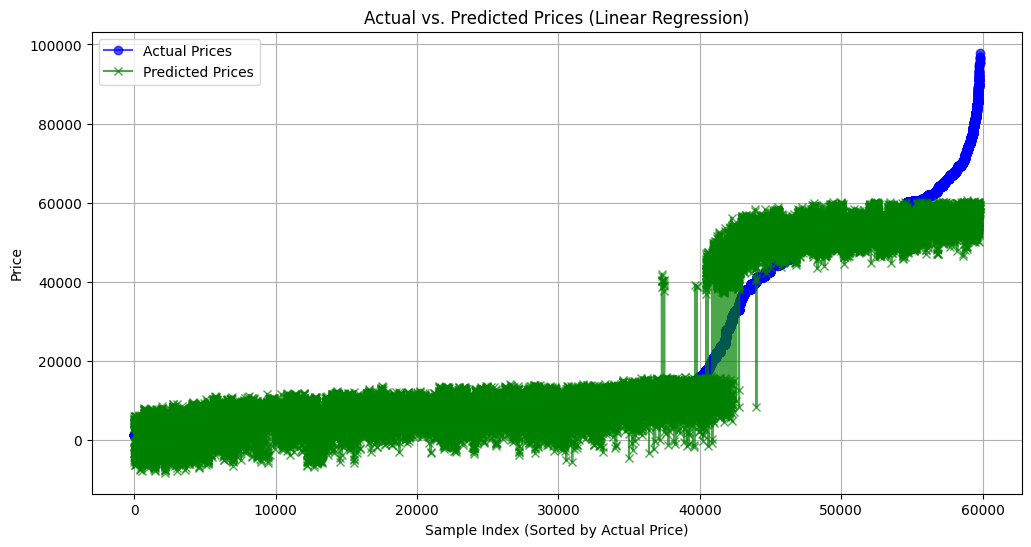

In [51]:

import seaborn as sns

# Generate predictions for validation data
y_pred = model.predict(X_valid)

# Sort values for better visualization
sorted_indices = np.argsort(y_valid.values)
y_valid_sorted = y_valid.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))

plt.plot(y_valid_sorted, label="Actual Prices", color="blue", linestyle="-", marker="o", alpha=0.7)
plt.plot(y_pred_sorted, label="Predicted Prices", color="green", linestyle="-", marker="x", alpha=0.7)

plt.xlabel("Sample Index (Sorted by Actual Price)")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.legend()
plt.grid(True)

plt.show()